# Distributional Semantics


#### Query, Key, Value Model

This comes from the search engine / recommendation terminology. Going back in history to early days of search engine, inverted indices was the data structure which powered searches on large databases.

Documents were indexed based on words. An entry in an inverted index can be imagined as Key,Value pair as shown,



This kind of indexing accelerates keyword based searches.

Let us say the whole vocabulary is a set, V = {keyword1,....keywordm}; m keywords; and the document corpus is D ={Document1,...Documentn} ; n documents

Given a query, Q = {keyword1,keyword20,keyword21}. We can retrieve all the all documents containing the key word query as follows

results = sum( intersection(Q, K) * V) for all n Documents







In [ ]:
{% highlight python %}
{keyword1,keyword21,keyword45}:{Document1,Document100,Document121}
{% endhighlight %}

In [ ]:
{% highlight python %}
vocabulary = ['a','b','c','d']
documents  = ['d1','d2', 'd3','d4','d5']

inverted_index = {('a','b'): ['d1','d2']
                 ,('a','c'): ['d1','d2','d3']
                 ,('b'): ['d1','d2']
                 ,('c','d'): ['d4','d5']
                 }

query = ('a','c')


results = set()
for key,value in inverted_index.items():
    match = set(query).intersection(set(key))
    if  len(match) >= 1:
        for document in value:
            results.add(document)
{% endhighlight %}

The function intersection(Q, K) can be replaced by a scoring function instead of a discrete intersection. Imaging our *pairwise_scoring* replacing this function.

While explaining the bare bones attention, our input played the role of Query, Key, and Value. There is no rule that Query, Key, and Value should be three different inputs. When same input is used for query, key and value, its called as *self-attention*.

Attention is a feature enhancement mechanism to improve the downstream applications. Query, Key,Value model is a
comfortable way to explain the input of different downstream tasks like search, sequence to sequence learning, language models, and others. Hence Query, Key, and Value representation are used while describing attention.


### Distributional Semantics

In [55]:
import numpy as np

sample_corpus =[

    "cat was chased by dog"
   ,"dog barks always"
   ,"cat and dog are domestic animals" 
   ,"animals in home include cat and dog" 
    ,"domenstic animals are home grown"
]

stop_words = ["and", "but", "are", "in", "by"]

no_docs     = len(sample_corpus)
all_words   = []
for doc in sample_corpus:
    words = [word.strip() for word in doc.split(" ")]
    for word in words:
        if word not in all_words and word not in stop_words:
            all_words.append(word.strip())



Get a list of all unique words, excluding some stop words.

In [56]:
no_words = len(all_words)

word_doc_matrix = np.zeros((no_words, no_docs))

for word_id, word in enumerate(all_words):
    for doc_id, doc in enumerate(sample_corpus):
        words_in_doc = [word.strip() for word in doc.split(" ")]

        if word in words_in_doc:
            word_doc_matrix[word_id, doc_id] = 1

word_doc_matrix


array([[1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

Contruct a word document matrix, where each row represent a word and each column is the document. The entries are binary values 
indicating the presence/absencce of a word in a document.

In [57]:
correlation_matrix = np.matmul(word_doc_matrix, word_doc_matrix.T)

def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

nrm_matrix = np.apply_along_axis(softmax, 1, correlation_matrix)
nrm_matrix

array([[0.30828952, 0.04172245, 0.04172245, 0.30828952, 0.01534883,
        0.01534883, 0.04172245, 0.11341338, 0.04172245, 0.04172245,
        0.01534883, 0.01534883],
       [0.14402922, 0.14402922, 0.14402922, 0.14402922, 0.05298539,
        0.05298539, 0.05298539, 0.05298539, 0.05298539, 0.05298539,
        0.05298539, 0.05298539],
       [0.14402922, 0.14402922, 0.14402922, 0.14402922, 0.05298539,
        0.05298539, 0.05298539, 0.05298539, 0.05298539, 0.05298539,
        0.05298539, 0.05298539],
       [0.19481472, 0.02636531, 0.02636531, 0.52956131, 0.02636531,
        0.02636531, 0.02636531, 0.07166833, 0.02636531, 0.02636531,
        0.00969925, 0.00969925],
       [0.05829257, 0.05829257, 0.05829257, 0.15845563, 0.15845563,
        0.15845563, 0.05829257, 0.05829257, 0.05829257, 0.05829257,
        0.05829257, 0.05829257],
       [0.05829257, 0.05829257, 0.05829257, 0.15845563, 0.15845563,
        0.15845563, 0.05829257, 0.05829257, 0.05829257, 0.05829257,
        0.05829257,

<Axes: >

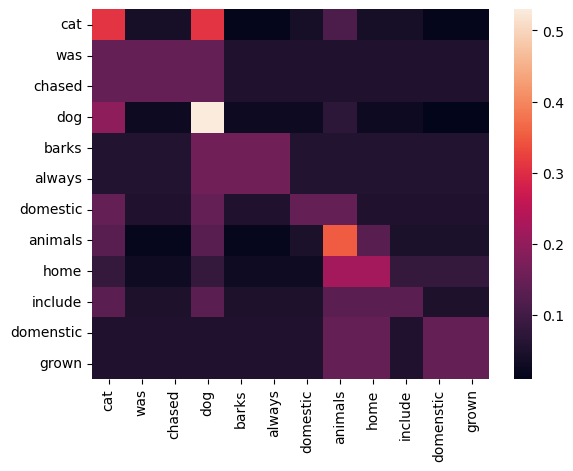

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(nrm_matrix,xticklabels=all_words,yticklabels=all_words)

The heatmap captures the realationship between words. You can see in row 1, where is cat is highly correlated with itself and also with dog.
The reason for this correlation is that cat and dog have occured together in 3 out of 4 sentences in the corpus.



<Axes: >

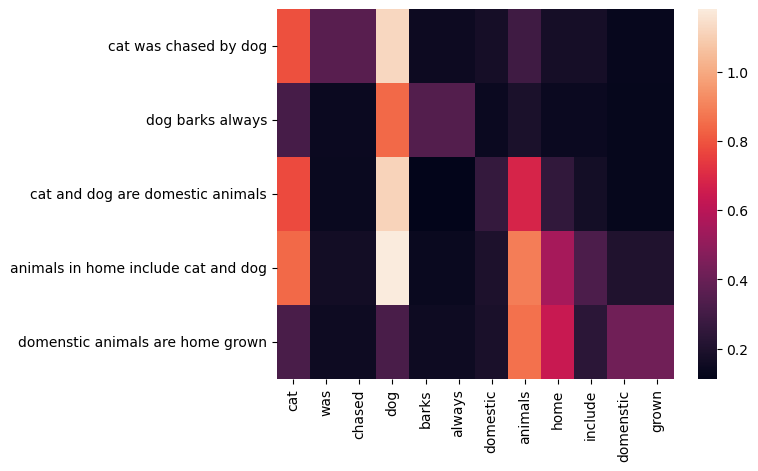

In [61]:
attention =np.matmul(word_doc_matrix.T, nrm_matrix)
sns.heatmap(attention,yticklabels=sample_corpus, xticklabels=all_words)